In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from datascience import *
%matplotlib inline

Null hypothesis : Panel members were selected at random from population of eligible jurors.

Alternative hypothesis : The panel member selection had bias, not chosen at random.

Added the data to a table (using the data science library)

In [34]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


Visualizing the difference between ehtnicities using a bar graph.

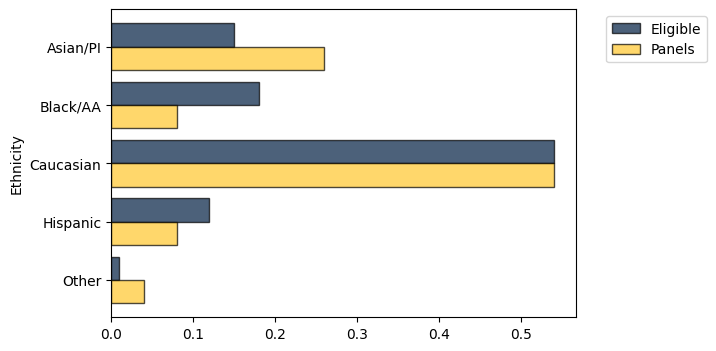

In [35]:
jury.barh('Ethnicity')

Taking random samples from the eligible population to determine how close / far the distribution of random samples is from the eligible population, and shows how the distribution of panel is NOT close to the samples at all.
This implies that there is some bias when it came to decision of choosing panel members.

In [36]:
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.140399
Black/AA,0.18,0.08,0.188575
Caucasian,0.54,0.54,0.545079
Hispanic,0.12,0.08,0.113558
Other,0.01,0.04,0.0123882


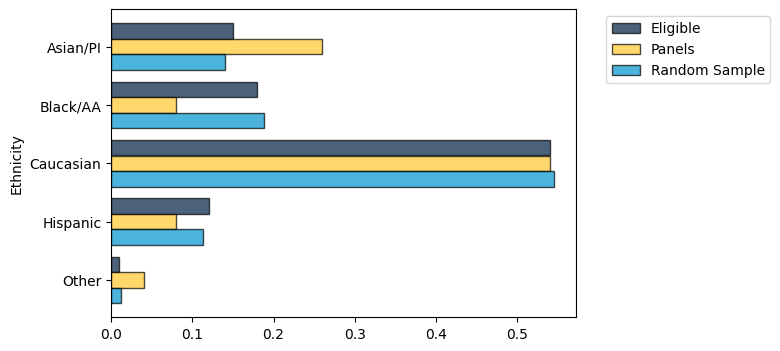

In [37]:
panels_and_sample.barh('Ethnicity')


It is clear that the random sample and the eligible are very close to each other, but the panel is wastly different from both the random sample and eligible jurors

Using the distance of two distributions as a new measure (absolute, to prevent values from cancelling each other)

In [38]:
jury_with_diffs = jury.with_column(
    'Difference', np.abs(jury.column('Panels') - jury.column('Eligible'))
)
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,0.04
Other,0.01,0.04,0.03


Finding the total variation distance (TVD) between the two distributions. This will act as the test statistic when performing hypothesis testing.

In [39]:
jury_with_diffs.column('Difference').sum() / 2


0.14000000000000001

Test Statistic : Difference in variation of eligible jurors and panel is =0.14

Result is sum divided by 2 (average difference of the values of the random sample and the eligible jurors) 

In [40]:
def tvd(d1, d2):
    return sum(np.abs(d1 - d2)) / 2

Generate random samples from eligible popluation and compute TVD between teh random sample and the eligible observed population

In [41]:
sample_distribution = sample_proportions(1453, eligible_population)
tvd(sample_distribution, eligible_population)

0.022126634549208581

The distances are much smaller then the original test statistic, i.e 0.14

Simulation

[0.019745354439091551, 0.021300757054370262, 0.024425326909841692, 0.02379215416379904, 0.014879559532002797, 0.012684101858224356, 0.019972470750172038, 0.017997247075017223, 0.0092429456297315853, 0.031362697866483179, 0.020757054370268417, 0.028802477632484499, 0.010027529249827962, 0.0085547143840330221, 0.011631108052305567, 0.034838265657260871, 0.0092980041293874768, 0.0093186510667584137, 0.018107364074328929, 0.0085891259463179541, 0.020571231933929793, 0.0099724707501720154, 0.019160357880247749, 0.019972470750172017, 0.011589814177563624, 0.016854783207157595, 0.026104611149346174, 0.018320715760495543, 0.031954576737783902, 0.016090846524432177, 0.045684790089470032, 0.012456985547143865, 0.0096214728148657953, 0.013372333103922891, 0.023007570543702661, 0.013427391603578823, 0.017536132140399147, 0.017157604955264964, 0.023771507226428075, 0.014528561596696486, 0.020984170681348922, 0.026909841706813493, 0.01264969029593942, 0.012718513420509284, 0.016730901582931841, 0.01

<AxesSubplot: ylabel='Count'>

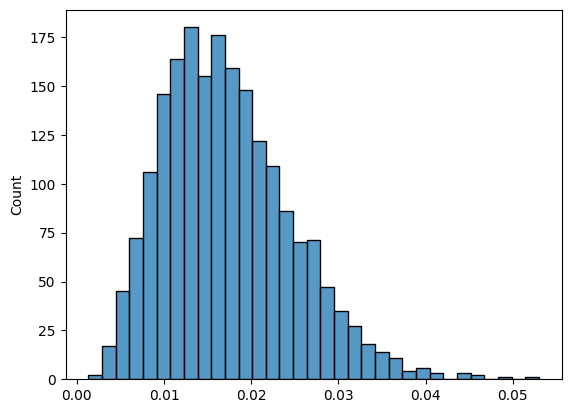

In [42]:
# Return the tvd for eligible population and random sample.
# Running the simulation 2000 times.
def sim_tvd():
    smp = sample_proportions(1453, eligible_population)
    return tvd(smp, eligible_population)

tvd_res = []
sims = 2000

for i in range(sims):
    tvd_res.append(sim_tvd())

print(tvd_res)

sb.histplot(tvd_res)

We can see that majority of differences is in the range 0.01 to 0.04. The test statistic is 0.14, as shown by the red dot below.

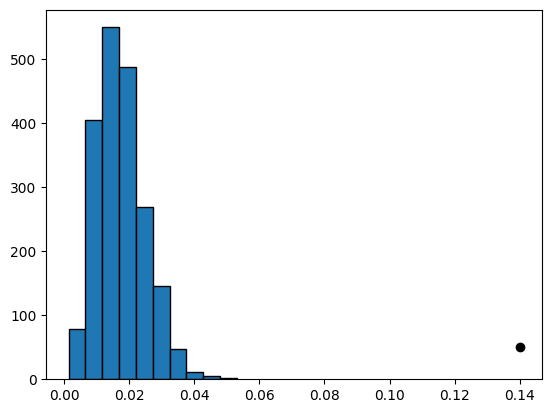

In [43]:
plt.hist(tvd_res,bins=10)
plt.scatter(x=0.14, y= 50,color='black')

Conclusion thus far : 

The jurors were not chosen randomly, and there was a lot of bias in the selection.

This means that the panels were not representative of the distribution provided by eligible jurors. This means we can reject the null hypothesis in favour of the alternative hypothesis.